# Importing the dataset and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


import itertools
import matplotlib.gridspec as gridspec


Importing the cleaned crash statistic dataset. 

In [2]:
crash=pd.read_csv('/Users/winifredwetthasinghe/Documents/Data_Science_Course_UTS/Capstone/Cleaned Crash Statistics Victoria.csv')
crash

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DCA_CODE,HIT_RUN_FLAG,...,DEG_URBAN_ALL,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed
0,3401744,T20130013732,ABS to receive accident,Finished,1/7/2013,18.30.00,Yes,Struck Pedestrian,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIGHT.,No,...,MELB_URBAN,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Non-Intersection,METROPOLITAN NORTH WEST REGION
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,PARKED VEHICLES ONLY,No,...,MELB_URBAN,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION
2,3401746,T20130013737,ABS to receive accident,Finished,2/7/2013,13.15.00,No,Collision with a fixed object,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,MELB_URBAN,BRIMBANK,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Intersection,METROPOLITAN NORTH WEST REGION
3,3401747,T20130013738,ABS to receive accident,Finished,2/7/2013,16.45.00,No,Collision with a fixed object,RIGHT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICLE,No,...,RURAL_VICTORIA,MITCHELL,Country,Div,Divided,Freeway,Freeway,Tuesday,Non-Intersection,NORTHERN REGION
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,U TURN,No,...,"MELBOURNE_CBD,MELB_URBAN",MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,METROPOLITAN NORTH WEST REGION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74903,3476647,T20190001963,ABS to receive accident,Finished,1/2/2019,13.55.00,No,Collision with vehicle,OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148,No,...,MELB_URBAN,HUME,Metro,"Div,Undiv",Divided,Arterial Other,Arterial Other,Friday,Intersection,METROPOLITAN NORTH WEST REGION
74904,3476648,T20190001967,ABS to receive accident,Finished,31/1/2019,21.45.00,Yes,Collision with a fixed object,OUT OF CONTROL (OVERTAKING),No,...,MELB_URBAN,YARRA,Metro,Undiv,Undivided,Local Road,Local Road,Wednesday,Intersection,METROPOLITAN NORTH WEST REGION
74905,3476649,T20190001969,ABS to receive accident,Finished,7/1/2019,09.30.00,No,Struck Pedestrian,ANY MANOEUVRE INVOLVING PED NOT INCLUDED IN DC...,No,...,MELB_URBAN,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Monday,Intersection,METROPOLITAN NORTH WEST REGION
74906,3476650,T20190001978,ABS to receive accident,Finished,1/2/2019,17.28.00,Yes,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,MELB_URBAN,DANDENONG,Metro,Div,Divided,Arterial Highway,Arterial Highway,Friday,Non-Intersection,METROPOLITAN SOUTH EAST REGION


# Target feature

The feature of interest is the severity of the accidents. Let's investigate the target variable. 

In [3]:
crash[['SEVERITY']]

,SEVERITY
0,Serious injury accident
1,Serious injury accident
2,Serious injury accident
3,Serious injury accident
4,Other injury accident
...,...
74903,Other injury accident
74904,Other injury accident
74905,Other injury accident
74906,Serious injury accident


All possible predictor variables

In [4]:
crash[['SEVERITY']].value_counts()

SEVERITY               
Other injury accident      52032
Serious injury accident    21561
Fatal accident              1314
Non injury accident            1
dtype: int64

Combining the "serious injury accident" and "fatal accident" together as "serious/fatal injury". Ignoring non injury accident.Let's rearrange the column values. 

In [5]:
replace_values = {'Fatal accident' : 1, 'Serious injury accident' : 1, 'Other injury accident' : 0, 'Non injury accident':0 }     

In [6]:
crash = crash.replace({"SEVERITY": replace_values})  

In [7]:
crash[['SEVERITY']]

,SEVERITY
0,1
1,1
2,1
3,1
4,0
...,...
74903,0
74904,0
74905,0
74906,1


In [8]:
crash['SEVERITY'].value_counts()

0    52033
1    22875
Name: SEVERITY, dtype: int64

Target variable now is in binary format and will be implementing a model that will best predict this binary classification model.

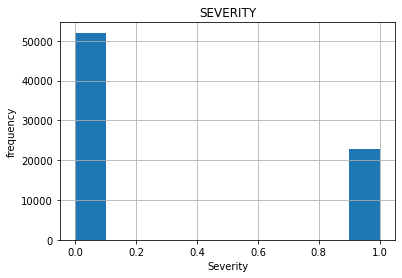

In [9]:
frame = crash.hist('SEVERITY', bins= 10)

for ax in frame.flatten():
    ax.set_xlabel("Severity")
    ax.set_ylabel("frequency")

Text(0, 0.5, 'Count')

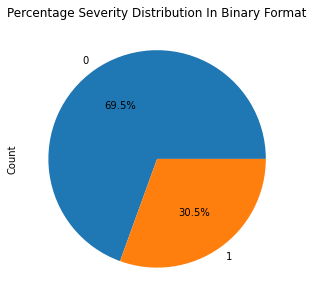

In [10]:

plt.figure(figsize=(8,5))


crash['SEVERITY'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',shadow=False)
plt.title('Percentage Severity Distribution In Binary Format')
plt.ylabel('Count')

In [151]:
# plt.figure(figsize=(8,5))
# plot=sns.barplot(crash[crash['SEVERITY']==0][['MOTORCYCLE']==1].counts().index,
#             'MOTORCYCLE', data=crash[crash['SEVERITY']==0][['MOTORCYCLE']==1].counts(), palette ='YlOrBr', linewidth=2)
# plt.xlabel('Severity', fontsize=10)
# plt.ylabel('Number of occurrances', fontsize=10)
# plt.title('Effect of motocycle accidents on the severity of the case', loc='Center', fontsize=14)

In [156]:
# crash[crash['SEVERITY']==0][['MOTORCYCLE']==1].value_counts()
# # crash[crash['SEVERITY']==1][['MOTORCYCLE']==1].value_counts()

# Feature selection and feature engineering

How to select features and what are Benefits of performing feature selection before modeling data?
· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
· Improves Accuracy: Less misleading data means modeling accuracy improves.
· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

Removing the features that are directly related and influence target feature. Such as INJ_OR_FATAL, FATALITY, SERIOUSINJURY, OTHERINJURY, NONINJURED   

In [11]:
crash.columns

Index(['OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION', 'POLICE_ATTEND',
       'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE', 'RUN_OFFROAD', 'NODE_ID',
       'LONGITUDE', 'LATITUDE', 'LGA_NAME', 'REGION_NAME', 'VICGRID_X',
       'VICGRID_Y', 'TOTAL_PERSONS', 'INJ_OR_FATAL', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'UNKNOWN', 'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN',
       'OLD_DRIVER', 'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED',
       'NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE',
       'PUBLICVEHICLE', 'DEG_URBAN_NAME', 'DEG_URBAN_ALL', 'LGA_NAME_ALL',
       'STAT_DIV_NAME', 'DIVIDED_ALL_Imputed', 'DIVIDED_Imputed',
       'RMA_ALL_Imputed', 'RMA_Imputed', 'DAY_OF_WEEK_Imputed

In [12]:
corr_features = crash.drop(['SEVERITY', 'INJ_OR_FATAL', 'FATALITY','SERIOUSINJURY','OTHERINJURY', 'NONINJURED','OBJECTID','NODE_ID','POLICE_ATTEND'], axis =1 )

<AxesSubplot:>

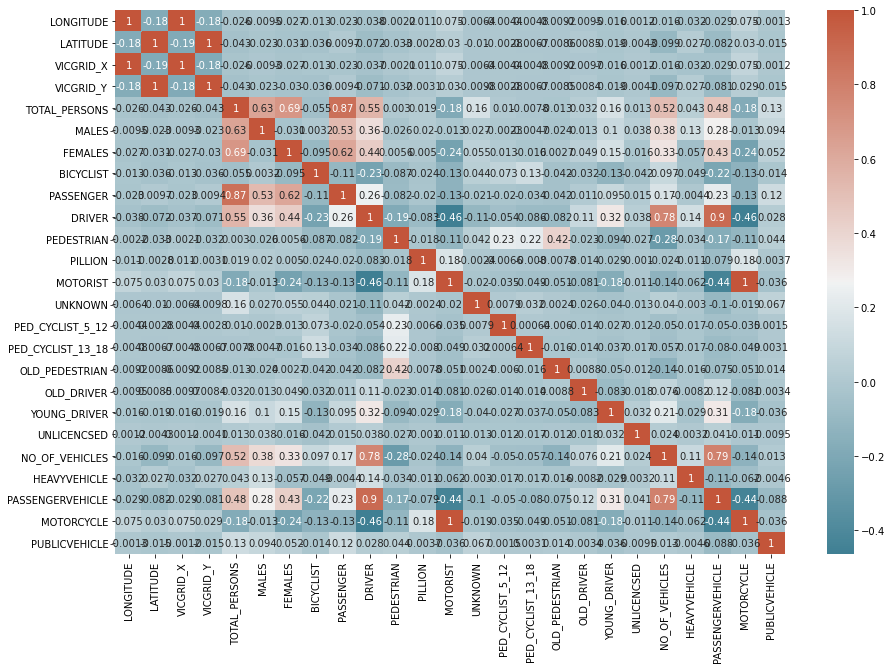

In [13]:
corr = corr_features.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [14]:
correlation = corr_features.corr().abs()
correlation

,LONGITUDE,LATITUDE,VICGRID_X,VICGRID_Y,TOTAL_PERSONS,MALES,FEMALES,BICYCLIST,PASSENGER,DRIVER,...,PED_CYCLIST_13_18,OLD_PEDESTRIAN,OLD_DRIVER,YOUNG_DRIVER,UNLICENCSED,NO_OF_VEHICLES,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE
LONGITUDE,1.000000,0.179012,0.999872,0.176956,0.026106,0.009485,0.026660,0.013385,0.022722,0.037522,...,0.004785,0.009203,0.009525,0.015815,0.001222,0.016328,0.031885,0.029395,0.074762,0.001340
LATITUDE,0.179012,1.000000,0.186010,0.999914,0.043379,0.023043,0.030794,0.036297,0.009736,0.071927,...,0.006733,0.008609,0.008531,0.018746,0.004284,0.098868,0.027231,0.082354,0.029977,0.015327
VICGRID_X,0.999872,0.186010,1.000000,0.183934,0.025923,0.009347,0.026613,0.013091,0.022680,0.037370,...,0.004786,0.009211,0.009704,0.015772,0.001220,0.016042,0.031754,0.029270,0.074623,0.001193
VICGRID_Y,0.176956,0.999914,0.183934,1.000000,0.042754,0.022651,0.030418,0.035604,0.009408,0.070651,...,0.006693,0.008468,0.008366,0.018540,0.004102,0.097138,0.026777,0.080935,0.029411,0.015067
TOTAL_PERSONS,0.026106,0.043379,0.025923,0.042754,1.000000,0.630253,0.692135,0.055152,0.870425,0.553033,...,0.007849,0.013260,0.032098,0.160460,0.013244,0.516643,0.043360,0.484443,0.183275,0.125617
MALES,0.009485,0.023043,0.009347,0.022651,0.630253,1.000000,0.031108,0.003159,0.528743,0.359995,...,0.004686,0.023664,0.012732,0.102638,0.038420,0.381621,0.132806,0.275446,0.012871,0.093684
FEMALES,0.026660,0.030794,0.026613,0.030418,0.692135,0.031108,1.000000,0.095361,0.621948,0.444779,...,0.016348,0.002665,0.049293,0.150085,0.015686,0.333073,0.056509,0.432074,0.237104,0.051803
BICYCLIST,0.013385,0.036297,0.013091,0.035604,0.055152,0.003159,0.095361,1.000000,0.108184,0.233401,...,0.130903,0.041576,0.031956,0.125743,0.041802,0.096832,0.048769,0.217349,0.133237,0.014075
PASSENGER,0.022722,0.009736,0.022680,0.009408,0.870425,0.528743,0.621948,0.108184,1.000000,0.255568,...,0.034195,0.042472,0.010918,0.095288,0.014503,0.168096,0.004426,0.225899,0.134772,0.120367
DRIVER,0.037522,0.071927,0.037370,0.070651,0.553033,0.359995,0.444779,0.233401,0.255568,1.000000,...,0.086025,0.082246,0.105775,0.317653,0.037802,0.776528,0.139590,0.897831,0.463311,0.027843


In [15]:
crash.columns

Index(['OBJECTID', 'ACCIDENT_NO', 'ABS_CODE', 'ACCIDENT_STATUS',
       'ACCIDENT_DATE', 'ACCIDENT_TIME', 'ALCOHOLTIME', 'ACCIDENT_TYPE',
       'DCA_CODE', 'HIT_RUN_FLAG', 'LIGHT_CONDITION', 'POLICE_ATTEND',
       'ROAD_GEOMETRY', 'SEVERITY', 'SPEED_ZONE', 'RUN_OFFROAD', 'NODE_ID',
       'LONGITUDE', 'LATITUDE', 'LGA_NAME', 'REGION_NAME', 'VICGRID_X',
       'VICGRID_Y', 'TOTAL_PERSONS', 'INJ_OR_FATAL', 'FATALITY',
       'SERIOUSINJURY', 'OTHERINJURY', 'NONINJURED', 'MALES', 'FEMALES',
       'BICYCLIST', 'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST',
       'UNKNOWN', 'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN',
       'OLD_DRIVER', 'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED',
       'NO_OF_VEHICLES', 'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE',
       'PUBLICVEHICLE', 'DEG_URBAN_NAME', 'DEG_URBAN_ALL', 'LGA_NAME_ALL',
       'STAT_DIV_NAME', 'DIVIDED_ALL_Imputed', 'DIVIDED_Imputed',
       'RMA_ALL_Imputed', 'RMA_Imputed', 'DAY_OF_WEEK_Imputed

In [88]:
crash['DATE_TIME'] = crash['ACCIDENT_DATE'] + ' ' + crash['ACCIDENT_TIME']

In [89]:
crash["DATE_TIME"]= pd.to_datetime(crash["DATE_TIME"], utc=True, format='%d/%m/%Y %H.%M.%S')

In [90]:
crash["DATE_TIME"].dtypes

datetime64[ns, UTC]

In [91]:
crash[['DATE_TIME']]

,DATE_TIME
0,2013-07-01 18:30:00+00:00
1,2013-07-02 16:40:00+00:00
2,2013-07-02 13:15:00+00:00
3,2013-07-02 16:45:00+00:00
4,2013-07-02 15:48:00+00:00
...,...
74903,2019-02-01 13:55:00+00:00
74904,2019-01-31 21:45:00+00:00
74905,2019-01-07 09:30:00+00:00
74906,2019-02-01 17:28:00+00:00


There are many features share similar values of correlations, so we will be doing some feature engineering to introduce a few new features by creating dummy variables as well as to convert categorical data into numerical so that they are ready for modelling.

In [16]:
y = crash['SEVERITY']
pred_features = crash.drop(['SEVERITY', 'ABS_CODE', 'DCA_CODE','NODE_ID', 'OBJECTID', 'LGA_NAME_ALL','POLICE_ATTEND', 'INJ_OR_FATAL', 'FATALITY','SERIOUSINJURY','OTHERINJURY', 'NONINJURED','DEG_URBAN_ALL','DIVIDED_ALL_Imputed','RMA_ALL_Imputed','REGION_NAME_ALL_Imputed','ACCIDENT_DATE', 'ACCIDENT_TIME'], axis =1 )

Note that several features were drop here for several reasons.
Severity- Target features. ABS_Code, DCA_Code, Node_ID, Object_ID-Just codes and cannot consider as a contirbuting factor. LGA_name_all, Divided_all_imputed, region_name_imputed- There are better and shorter representation of features are present. Police attended- No direct relation to a contributing factor. Inh_or_fatal, fatality, nonijured, serious_injury, other_injury- Completely bias the results. Accident_date, Accident_time. 

In [17]:
x = pred_features.set_index(['ACCIDENT_NO'])

In [18]:

x.head()

,ACCIDENT_STATUS,ALCOHOLTIME,ACCIDENT_TYPE,HIT_RUN_FLAG,LIGHT_CONDITION,ROAD_GEOMETRY,SPEED_ZONE,RUN_OFFROAD,LONGITUDE,LATITUDE,...,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,DEG_URBAN_NAME,STAT_DIV_NAME,DIVIDED_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed
ACCIDENT_NO,,,,,,,,,,,,,,,,,,,,,
T20130013732,Finished,Yes,Struck Pedestrian,No,Dark Street lights on,Not at intersection,60 km/hr,No,144.96980,-37.82202,...,0,1,0,0,MELB_URBAN,Metro,Undivided,Local Road,Monday,Non-Intersection
T20130013736,Finished,No,Collision with vehicle,No,Day,T intersection,60 km/hr,No,145.14671,-37.83166,...,0,3,0,0,MELB_URBAN,Metro,Divided,Arterial Other,Tuesday,Intersection
T20130013737,Finished,No,Collision with a fixed object,No,Day,T intersection,50 km/hr,Yes,144.80134,-37.74003,...,0,1,0,0,MELB_URBAN,Metro,Undivided,Local Road,Tuesday,Intersection
T20130013738,Finished,No,Collision with a fixed object,No,Day,Not at intersection,110 km/hr,Yes,145.07011,-37.17891,...,0,1,0,0,RURAL_VICTORIA,Country,Divided,Freeway,Tuesday,Non-Intersection
T20130013739,Finished,No,Collision with vehicle,No,Day,Not at intersection,50 km/hr,No,144.96530,-37.81808,...,0,1,0,1,MELBOURNE_CBD,Metro,Undivided,Local Road,Tuesday,Non-Intersection


In [19]:
x.columns

Index(['ACCIDENT_STATUS', 'ALCOHOLTIME', 'ACCIDENT_TYPE', 'HIT_RUN_FLAG',
       'LIGHT_CONDITION', 'ROAD_GEOMETRY', 'SPEED_ZONE', 'RUN_OFFROAD',
       'LONGITUDE', 'LATITUDE', 'LGA_NAME', 'REGION_NAME', 'VICGRID_X',
       'VICGRID_Y', 'TOTAL_PERSONS', 'MALES', 'FEMALES', 'BICYCLIST',
       'PASSENGER', 'DRIVER', 'PEDESTRIAN', 'PILLION', 'MOTORIST', 'UNKNOWN',
       'PED_CYCLIST_5_12', 'PED_CYCLIST_13_18', 'OLD_PEDESTRIAN', 'OLD_DRIVER',
       'YOUNG_DRIVER', 'ALCOHOL_RELATED', 'UNLICENCSED', 'NO_OF_VEHICLES',
       'HEAVYVEHICLE', 'PASSENGERVEHICLE', 'MOTORCYCLE', 'PUBLICVEHICLE',
       'DEG_URBAN_NAME', 'STAT_DIV_NAME', 'DIVIDED_Imputed', 'RMA_Imputed',
       'DAY_OF_WEEK_Imputed', 'NODE_TYPE_Imputed'],
      dtype='object')

In [20]:
x['ACCIDENT_TYPE'].value_counts()

Collision with vehicle               47239
Collision with a fixed object        11774
Struck Pedestrian                     6621
Vehicle overturned (no collision)     3713
No collision and no object struck     3633
Struck animal                          760
collision with some other object       711
Fall from or in moving vehicle         400
Other accident                          57
Name: ACCIDENT_TYPE, dtype: int64

In [93]:
crash[crash['ACCIDENT_TYPE']=="Collision with vehicle"]

,OBJECTID,ACCIDENT_NO,ABS_CODE,ACCIDENT_STATUS,ACCIDENT_DATE,ACCIDENT_TIME,ALCOHOLTIME,ACCIDENT_TYPE,DCA_CODE,HIT_RUN_FLAG,...,LGA_NAME_ALL,STAT_DIV_NAME,DIVIDED_ALL_Imputed,DIVIDED_Imputed,RMA_ALL_Imputed,RMA_Imputed,DAY_OF_WEEK_Imputed,NODE_TYPE_Imputed,REGION_NAME_ALL_Imputed,DATE_TIME
1,3401745,T20130013736,ABS to receive accident,Finished,2/7/2013,16.40.00,No,Collision with vehicle,PARKED VEHICLES ONLY,No,...,WHITEHORSE,Metro,"Div,Undiv",Divided,"Arterial Other,Local Road",Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:40:00+00:00
4,3401748,T20130013739,ABS to receive accident,Finished,2/7/2013,15.48.00,No,Collision with vehicle,U TURN,No,...,MELBOURNE,Metro,Undiv,Undivided,Local Road,Local Road,Tuesday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2013-07-02 15:48:00+00:00
6,3401750,T20130013742,ABS to receive accident,Finished,2/7/2013,16.10.00,No,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,BAYSIDE,Metro,"Div,Undiv",Divided,"Arterial Highway,Local Road",Arterial Highway,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 16:10:00+00:00
7,3401751,T20130013743,ABS to receive accident,Finished,2/7/2013,17.50.00,No,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,BOROONDARA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Tuesday,Non-Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 17:50:00+00:00
8,3401752,T20130013744,ABS to receive accident,Finished,2/7/2013,17.30.00,No,Collision with vehicle,RIGHT THROUGH,No,...,BOROONDARA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Tuesday,Intersection,METROPOLITAN SOUTH EAST REGION,2013-07-02 17:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74899,3476643,T20190001949,ABS to receive accident,Finished,1/2/2019,13.07.00,No,Collision with vehicle,RIGHT THROUGH,No,...,WHITEHORSE,Metro,Undiv,Undivided,"Arterial Other,Local Road",Arterial Other,Thursday,Intersection,METROPOLITAN SOUTH EAST REGION,2019-02-01 13:07:00+00:00
74900,3476644,T20190001953,ABS to receive accident,Finished,1/2/2019,11.15.00,No,Collision with vehicle,REAR END(VEHICLES IN SAME LANE),No,...,WHITTLESEA,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Friday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2019-02-01 11:15:00+00:00
74902,3476646,T20190001961,ABS to receive accident,Finished,1/2/2019,15.00.00,No,Collision with vehicle,RIGHT THROUGH,No,...,WYNDHAM,Metro,Undiv,Undivided,Arterial Other,Arterial Other,Friday,Non-Intersection,METROPOLITAN NORTH WEST REGION,2019-02-01 15:00:00+00:00
74903,3476647,T20190001963,ABS to receive accident,Finished,1/2/2019,13.55.00,No,Collision with vehicle,OTHER MANOEUVRING NOT INCLUDED IN DCAs 140-148,No,...,HUME,Metro,"Div,Undiv",Divided,Arterial Other,Arterial Other,Friday,Intersection,METROPOLITAN NORTH WEST REGION,2019-02-01 13:55:00+00:00


In [96]:
crash[crash['SEVERITY']==1]['MOTORCYCLE']

0        0
1        0
2        0
3        0
5        0
        ..
74889    1
74890    0
74892    0
74900    0
74906    0
Name: MOTORCYCLE, Length: 22875, dtype: int64

In [22]:
crash[crash['SEVERITY']==0]['MOTORCYCLE'].value_counts()

0    45572
1     6373
2       84
4        2
3        2
Name: MOTORCYCLE, dtype: int64

In [23]:
predictive_features = list(x.columns)
predictive_features

['ACCIDENT_STATUS',
 'ALCOHOLTIME',
 'ACCIDENT_TYPE',
 'HIT_RUN_FLAG',
 'LIGHT_CONDITION',
 'ROAD_GEOMETRY',
 'SPEED_ZONE',
 'RUN_OFFROAD',
 'LONGITUDE',
 'LATITUDE',
 'LGA_NAME',
 'REGION_NAME',
 'VICGRID_X',
 'VICGRID_Y',
 'TOTAL_PERSONS',
 'MALES',
 'FEMALES',
 'BICYCLIST',
 'PASSENGER',
 'DRIVER',
 'PEDESTRIAN',
 'PILLION',
 'MOTORIST',
 'UNKNOWN',
 'PED_CYCLIST_5_12',
 'PED_CYCLIST_13_18',
 'OLD_PEDESTRIAN',
 'OLD_DRIVER',
 'YOUNG_DRIVER',
 'ALCOHOL_RELATED',
 'UNLICENCSED',
 'NO_OF_VEHICLES',
 'HEAVYVEHICLE',
 'PASSENGERVEHICLE',
 'MOTORCYCLE',
 'PUBLICVEHICLE',
 'DEG_URBAN_NAME',
 'STAT_DIV_NAME',
 'DIVIDED_Imputed',
 'RMA_Imputed',
 'DAY_OF_WEEK_Imputed',
 'NODE_TYPE_Imputed']

In [24]:
x['ALCOHOLTIME'].value_counts()

No     47277
Yes    27631
Name: ALCOHOLTIME, dtype: int64

In [25]:
x['ACCIDENT_STATUS'].value_counts()

Finished    74881
Reopened       27
Name: ACCIDENT_STATUS, dtype: int64

In [26]:
x['HIT_RUN_FLAG'].value_counts()

No           70736
Yes           3825
Not known      347
Name: HIT_RUN_FLAG, dtype: int64

In [27]:
x['LIGHT_CONDITION'].value_counts()

Day                           48990
Dark Street lights on         11325
Dusk/Dawn                      7769
Dark No street lights          4056
Unk.                           1857
Dark Street lights unknown      748
Dark Street lights off          163
Name: LIGHT_CONDITION, dtype: int64

In [28]:
 x['ROAD_GEOMETRY'].value_counts()

Not at intersection      38597
T intersection           17587
Cross intersection       16752
Multiple intersection     1630
Y intersection             135
Unknown                    103
Dead end                    96
Private property             4
Road closure                 4
Name: ROAD_GEOMETRY, dtype: int64

In [29]:
x['SPEED_ZONE'].value_counts()

60 km/hr                       24998
50 km/hr                       12386
100 km/hr                      11248
80 km/hr                       10675
70 km/hr                        4978
40 km/hr                        4419
Not known                       4411
110 km/hr                        800
Camping grounds or off road      508
90 km/hr                         246
30km/hr                          119
Other speed limit                107
75 km/hr                          13
Name: SPEED_ZONE, dtype: int64

In [30]:
x['RUN_OFFROAD'].value_counts()

No     60945
Yes    13963
Name: RUN_OFFROAD, dtype: int64

In [31]:
x['REGION_NAME'].value_counts()

METROPOLITAN NORTH WEST REGION    26693
METROPOLITAN SOUTH EAST REGION    26486
SOUTH WESTERN REGION               5478
NORTHERN REGION                    4155
EASTERN REGION                     4152
NORTH EASTERN REGION               4067
WESTERN REGION                     3830
                                     47
Name: REGION_NAME, dtype: int64

In [32]:
x['ALCOHOL_RELATED'].value_counts()

No     72429
Yes     2479
Name: ALCOHOL_RELATED, dtype: int64

In [33]:
x['DEG_URBAN_NAME'].value_counts()

MELB_URBAN                 47073
RURAL_VICTORIA             15819
LARGE_PROVINCIAL_CITIES     4219
SMALL_CITIES                3794
TOWNS                       2308
MELBOURNE_CBD               1040
SMALL_TOWNS                  655
Name: DEG_URBAN_NAME, dtype: int64

In [34]:
x['DAY_OF_WEEK_Imputed'].value_counts()

Friday       12847
Thursday     11363
Wednesday    11128
Tuesday      10813
Monday       10369
Sunday        9569
Saturday      8819
Name: DAY_OF_WEEK_Imputed, dtype: int64

In [35]:
x['NODE_TYPE_Imputed'].value_counts()

Non-Intersection    40481
Intersection        34113
Off Road              314
Name: NODE_TYPE_Imputed, dtype: int64

In [36]:
X = pd.get_dummies(data=x, columns =['ACCIDENT_STATUS', 'ALCOHOLTIME','ACCIDENT_TYPE','HIT_RUN_FLAG','LIGHT_CONDITION','ROAD_GEOMETRY','SPEED_ZONE','RUN_OFFROAD','REGION_NAME','ALCOHOL_RELATED', 'DEG_URBAN_NAME' , 'LGA_NAME','STAT_DIV_NAME','DIVIDED_Imputed','RMA_Imputed','DAY_OF_WEEK_Imputed','NODE_TYPE_Imputed'], prefix=['ACCIDENT_STATUS', 'ALCOHOLTIME','ACCIDENT_TYPE','HIT_RUN_FLAG','LIGHT_CONDITION','ROAD_GEOMETRY','SPEED_ZONE','RUN_OFFROAD','REGION_NAME','ALCOHOL_RELATED', 'DEG_URBAN_NAME' , 'LGA_NAME','STAT_DIV_NAME','DIVIDED_Imputed','RMA_Imputed','DAY_OF_WEEK_Imputed','NODE_TYPE_Imputed'], drop_first=True)

In [37]:
X.shape

(74908, 179)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74908 entries, T20130013732 to T20190001981
Columns: 179 entries, LONGITUDE to NODE_TYPE_Imputed_Off Road
dtypes: float64(4), int64(21), uint8(154)
memory usage: 25.9+ MB


# Split the data

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56181, 179) (18727, 179) (56181,) (18727,)


# Modelling

Modelling using: Decision Tree, Random Forest, Naives Bayes, Ensemble methods, K-Nearest Neighbour, Logistic Regression.

# Logistic Regression with hyper-parameter tuning

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [83]:
reg = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l1', solver='liblinear')

# Fit Model
reg.fit(X_train, y_train)
y_pred_test =reg.predict(X_test)
y_pred_train =reg.predict(X_train)

# Score

accuracy_score(y_test, y_pred_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.6533347573022908

In [ ]:
reg.coef_

In [110]:
def summary_report(actual,prediction):
    
    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    
    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

In [111]:
summary_report(y_test, y_pred_test)

Accuracy : 0.6533 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4482 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6291 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


In [112]:
from sklearn.metrics import confusion_matrix
cfm_1=confusion_matrix(y_test, y_pred_test)
cfm_1

array([[8669, 4390],
       [2102, 3566]])

In [164]:

TP = cfm_1[1, 1]
TN = cfm_1[0, 0]
FP = cfm_1[0, 1]
FN = cfm_1[1, 0]
(TP,FP,FN,TN)

(2017, 4372, 3651, 8687)

In [165]:
recall = recall_score(y_test, y_pred_test)
recall

0.3558574453069866

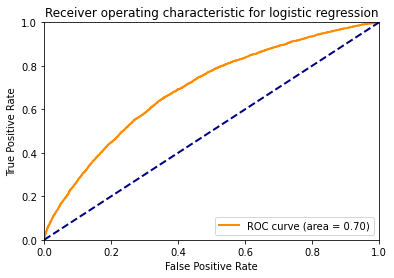

In [84]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = reg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for logistic regression')
plt.legend(loc = "lower right")
plt.show()

# Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gnb = GaussianNB()

# Fit Model
gnb.fit(X_train, y_train)
y_pred_test =gnb.predict(X_test)
y_pred_train =gnb.predict(X_train)

# Score
accuracy_score(y_test, y_pred_test)

0.6839322902760719

In [120]:
cfm_2=confusion_matrix(y_test, y_pred_test)
cfm_2

array([[12379,   680],
       [ 5239,   429]])

In [121]:
recall = recall_score(y_test, y_pred_test)
recall

0.07568807339449542

In [122]:
summary_report(y_test, y_pred_test)

Accuracy : 0.6839 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3868 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0757 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


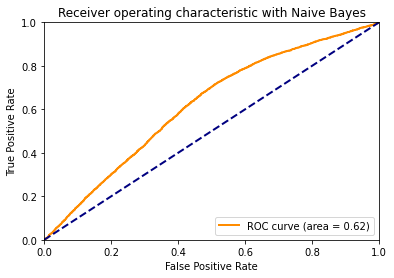

In [61]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = gnb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Naive Bayes')
plt.legend(loc = "lower right")
plt.show()

# Decision Tree Classifier

In [123]:
from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(max_depth=5)


# Fit Model
clf_dt.fit(X_train, y_train)
y_pred_test =clf_dt.predict(X_test)
y_pred_train =clf_dt.predict(X_train)

# Score
accuracy_score(y_test, y_pred_test)

0.7080151652693971

In [124]:
cfm_3=confusion_matrix(y_test, y_pred_test)
cfm_3

array([[12367,   692],
       [ 4776,   892]])

In [125]:
recall = recall_score(y_test, y_pred_test)
recall

0.15737473535638674

In [126]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7080 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5631 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1574 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


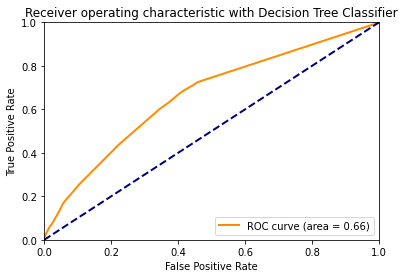

In [45]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_dt.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Decision Tree Classifier')
plt.legend(loc = "lower right")
plt.show()

# Random Forest Classifier

In [127]:
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier(n_estimators=100, random_state = 50, verbose=1)
clf_rf.fit(X_train, y_train)

y_pred_test =clf_rf.predict(X_test)
y_pred_train =clf_rf.predict(X_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished


In [128]:
accuracy_score(y_test, y_pred_test)

0.7049180327868853

In [69]:
cfm_4=confusion_matrix(y_test, y_pred_test)
cfm_4

array([[11839,  1220],
       [ 4306,  1362]])

In [129]:
recall = recall_score(y_test, y_pred_test)
recall

0.24029640084685958

In [130]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7049 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5275 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2403 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


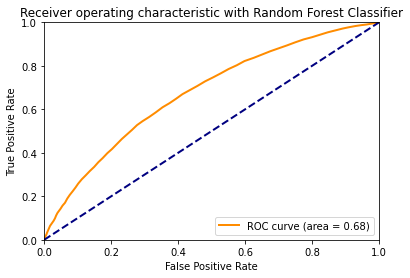

In [93]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_rf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Random Forest Classifier')
plt.legend(loc = "lower right")
plt.show()

# Random Forest with Class Weighting

In [49]:
from sklearn import metrics
from sklearn import ensemble

In [131]:
clf_rf_w = ensemble.RandomForestClassifier(n_estimators=500, criterion='entropy', warm_start=True, class_weight='balanced', max_depth=10, verbose=1)
clf_rf_w.fit(X_train, y_train)

y_pred_test =clf_rf_w.predict(X_test)
y_pred_train =clf_rf_w.predict(X_train)

accuracy_score(y_test, y_pred_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   29.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s 

0.6318684252683292

In [132]:
cfm_rf_b=confusion_matrix(y_test, y_pred_test)
cfm_rf_b

array([[8192, 4867],
       [2027, 3641]])

In [133]:
recall = recall_score(y_test, y_pred_test)
recall

0.642378263937897

In [134]:
summary_report(y_test, y_pred_test)

Accuracy : 0.6319 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.4280 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6424 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


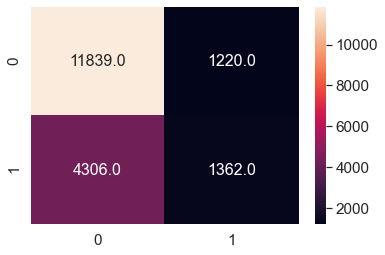

In [83]:
df_cm = pd.DataFrame(cfm_rf_b, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt=".1f") # font size

plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.0s finished


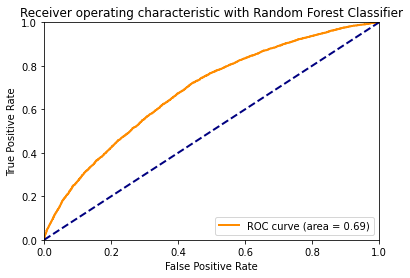

In [51]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_rf_w.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Random Forest Classifier')
plt.legend(loc = "lower right")
plt.show()

# KNN Classifier

In [135]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)#TODO
clf_knn.fit(X_train, y_train)

y_pred_test =clf_knn.predict(X_test)
y_pred_train =clf_knn.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.6408928285363379

In [84]:
cfm_5=confusion_matrix(y_test, y_pred_test)
cfm_5

array([[11839,  1220],
       [ 4306,  1362]])

In [85]:
recall = recall_score(y_test, y_pred_test)
recall

0.24029640084685958

In [86]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7049 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5275 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2403 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


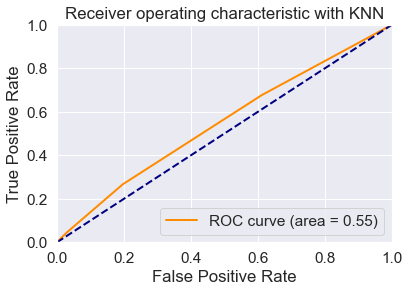

In [89]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_knn.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with KNN')
plt.legend(loc = "lower right")
plt.show()

# Ensemble Methods

# Bagging Meta Estimator

Here we build several estimators independently and then averaging predictions and combine estimators. These are better than single bag estimators that reduces variance.

# Pairing with KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [56]:
m = KNeighborsClassifier(n_neighbors=3)
bag = BaggingClassifier(
        m,
        max_samples=0.5,
        max_features=2,
        n_jobs=2,
        oob_score=True)
#out of bag score. method of measuring the prediction error of random forests, boosted decision trees, 
#and other machine learning models utilizing bootstrap aggregating (bagging)
bag.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_features=2, max_samples=0.5, n_jobs=2, oob_score=True)

In [92]:
accuracy_score(y_test, y_pred_test)

0.6408928285363379

In [93]:
recall_score(y_test, y_pred_test)

0.26693719124911786

In [96]:
summary_report(y_test, y_pred_test)

Accuracy : 0.6409 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.3706 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2669 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


In [94]:
bag.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
bag.predict_proba(X_test)

array([[0.7       , 0.3       ],
       [0.53333333, 0.46666667],
       [0.63333333, 0.36666667],
       ...,
       [0.7       , 0.3       ],
       [0.66666667, 0.33333333],
       [0.73333333, 0.26666667]])

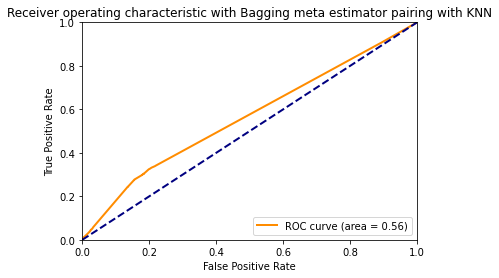

In [157]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = bag.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Bagging meta estimator pairing with KNN')
plt.legend(loc = "lower right")
plt.show()

# Default BaggingClassifier - Decision Tree Classifier

In [58]:
bag = BaggingClassifier(
        max_samples=0.5,
        max_features=2,
        n_jobs=2,
        oob_score=True)
#out of bag score. method of measuring the prediction error of random forests, boosted decision trees, 
#and other machine learning models utilizing bootstrap aggregating (bagging)
bag.fit(X_train, y_train)

y_pred_test = bag.predict(X_test)
y_pred_train = bag.predict(X_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


In [98]:
accuracy_score(y_test, y_pred_test)

0.6976023922678486

In [99]:
recall_score(y_test, y_pred_test)

0.0008821453775582216

In [100]:
summary_report(y_test, y_pred_test)

Accuracy : 0.6976 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.0009 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


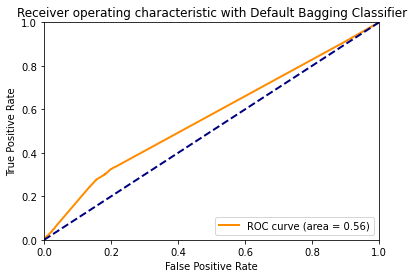

In [158]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = bag.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Default Bagging Classifier')
plt.legend(loc = "lower right")
plt.show()

# Boosting

# Gradient Boosting Classifier

In [72]:
clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)

y_pred_test =clf_gb.predict(X_test)
y_pred_train =clf_gb.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.7137822395471779

In [112]:
cfm_6=confusion_matrix(y_test, y_pred_test)
TP = cfm_6[1, 1]
TN = cfm_6[0, 0]
FP = cfm_6[0, 1]
FN = cfm_6[1, 0]
(TP,FP,FN,TN)
cfm_6

array([[12505,   554],
       [ 4806,   862]])

In [113]:
recall = recall_score(y_test, y_pred_test)
recall

0.1520818630910374

In [114]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7138 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6088 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1521 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


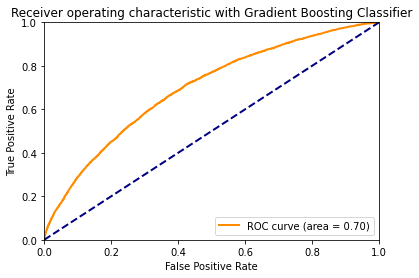

In [171]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_gb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Gradient Boosting Classifier')
plt.legend(loc = "lower right")
plt.show()

# Adaboost Classifier

In [74]:
clf_ab = ensemble.AdaBoostClassifier() 
clf_ab.fit(X_train, y_train)

y_pred_test =clf_ab.predict(X_test)
y_pred_train =clf_ab.predict(X_train)

In [116]:
test_acc=accuracy_score(y_test, y_pred_test)
test_acc

0.7114326907673413

In [117]:
cfm_7=confusion_matrix(y_test, y_pred_test)
TP = cfm_7[1, 1]
TN = cfm_7[0, 0]
FP = cfm_7[0, 1]
FN = cfm_7[1, 0]
(TP,FP,FN,TN)
cfm_7

array([[12202,   857],
       [ 4547,  1121]])

In [118]:
recall = recall_score(y_test, y_pred_test)
recall

0.19777699364855328

In [119]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7114 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5667 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.1978 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


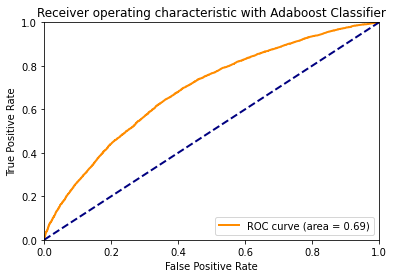

In [172]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf_ab.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Adaboost Classifier')
plt.legend(loc = "lower right")
plt.show()

# XGBoost Classifier

In [120]:
import xgboost
from xgboost import XGBClassifier

In [121]:
xgb = XGBClassifier(binary='logistic', random_state=50)

In [122]:
xgb.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:22:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, binary='logistic', booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=50, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [123]:
y_pred_test = xgb.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [124]:
xgb_y_prob = xgb.predict_proba(X_test)[:, 1]

In [125]:
y_pred_train =xgb.predict(X_train)

In [126]:
test_acc=accuracy_score(y_test, y_pred_test)
test_acc

0.713942436054894

In [137]:
cfm_8=confusion_matrix(y_test, y_pred_test)
TP = cfm_8[1, 1]
TN = cfm_8[0, 0]
FP = cfm_8[0, 1]
FN = cfm_8[1, 0]
(TP,FP,FN,TN)


(1513, 2570, 4155, 10489)

In [138]:
cfm_8

array([[10489,  2570],
       [ 4155,  1513]])

In [140]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
classification_error

0.3591071714636621

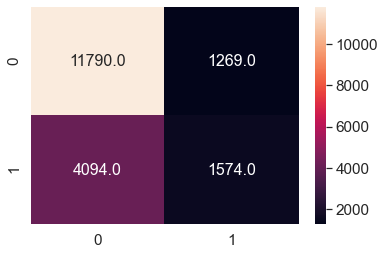

In [157]:
df_cm = pd.DataFrame(cfm_8, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt=".1f") # font size

plt.show()

In [128]:
recall = recall_score(y_test, y_pred_test)
recall

0.257939308398024

In [129]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7139 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5595 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2579 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


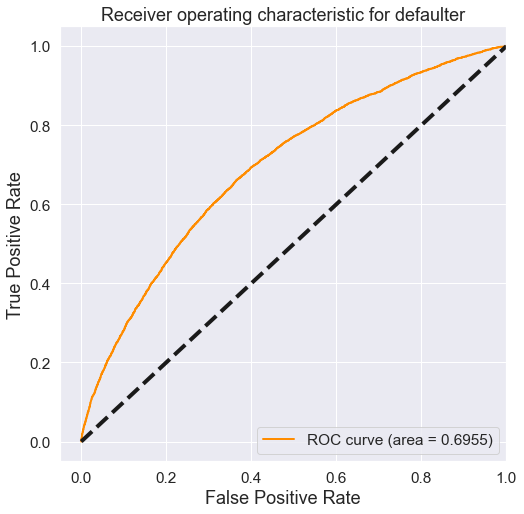

In [130]:
# For class 1, find the area under the curve

# Find fpr, tpr

fpr, tpr, _ = metrics.roc_curve(y_test, xgb_y_prob)

# Find auc

roc_auc = metrics.auc(fpr, tpr)

#Plot of a ROC curve for class 1 (default)
plt.figure(figsize=[8,8])

#Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = 'ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for defaulter', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [131]:
feature_importance_values = xgb.feature_importances_

In [132]:
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importance_values})

<ipython-input-133-7fe2ad368faa>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=[0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08], fontsize=18)


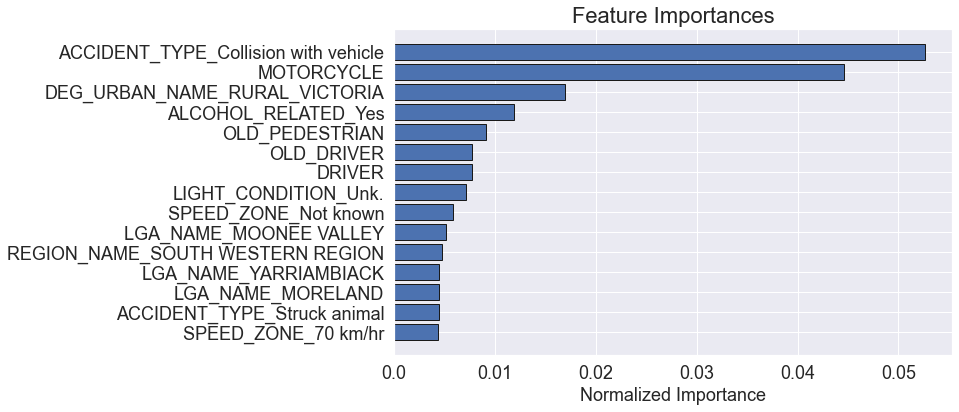

In [133]:
feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index()
    
# Normalize the feature importances to add up to one
feature_importances['importance_normalized'] = feature_importances['importance'] / feature_importances['importance'].sum()

# Make a horizontal bar chart of feature importances
plt.figure(figsize = (10, 6))
ax = plt.subplot()
    
# Need to reverse the index to plot most important on top
ax.barh(list(reversed(list(feature_importances.index[:15]))), 
feature_importances['importance_normalized'].head(15), align = 'center', edgecolor = 'k')
    
# Set the yticks and labels
ax.set_yticks(list(reversed(list(feature_importances.index[:15]))))
ax.set_yticklabels(feature_importances['feature'].head(15), fontsize=18)
ax.set_xticklabels(labels=[0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08], fontsize=18)  

# Plot labeling
plt.xlabel('Normalized Importance', fontsize=18); plt.title('Feature Importances', fontsize=22)
plt.show()

In [146]:
#Quick value check for model overfitiing. Extensive analysis is done in upcoming steps. 
y_pred_test = xgb.predict(X_test)
test_acc=accuracy_score(y_test, y_pred_test)

y_pred_train = xgb.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)

print('train: %.3f, test: %.3f' % (train_acc, test_acc))


train: 0.807, test: 0.714


# Xgboost different hyperparameters

In [77]:
import xgboost
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(random_state=50, learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [79]:
xgb.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:12:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=50, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [136]:
y_pred_test = xgb.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [137]:
y_pred_train =xgb.predict(X_train)

In [138]:
test_acc=accuracy_score(y_test, y_pred_test)
test_acc

0.7136220430394618

In [139]:
cfm_9=confusion_matrix(y_test, y_pred_test)
TP = cfm_9[1, 1]
TN = cfm_9[0, 0]
FP = cfm_9[0, 1]
FN = cfm_9[1, 0]
(TP,FP,FN,TN)
cfm_9

array([[11790,  1269],
       [ 4094,  1574]])

In [140]:
recall = recall_score(y_test, y_pred_test)
recall

0.27769936485532815

In [141]:
summary_report(y_test, y_pred_test)

Accuracy : 0.7136 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5536 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.2777 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


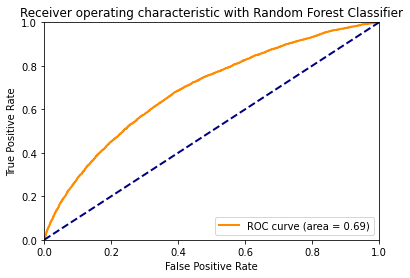

In [81]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = xgb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with Random Forest Classifier')
plt.legend(loc = "lower right")
plt.show()

# Checking for XGboost model overfitting

[22:34:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>1, train: 0.706, test: 0.710
[22:34:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>2, train: 0.717, test: 0.716
[22:34:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>3, train: 0.727, test: 0.716
[22:34:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner

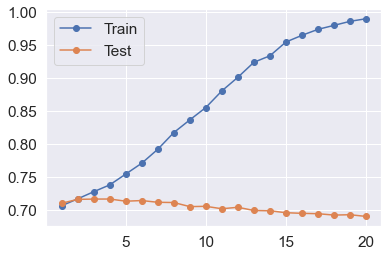

In [145]:
# # define lists to collect scores
train_scores, test_scores = list(), list()
# # define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	xgb_of=XGBClassifier(max_depth=i)
    
	# fit model on the training dataset
	xgb_of.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = xgb_of.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = xgb_of.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

Increasing the tree depth in the early stages results in an improvement in both train and test sets.
This continues until a depth of around 3/4 levels, after which the model is shown to overfit the training dataset at the cost of worse performance on the holdout dataset.

# Stacking

In [139]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 8.0 MB/s eta 0:00:01


In [147]:
from mlxtend.classifier import StackingClassifier

In [141]:
np.random.seed(0)
clf_knn = KNeighborsClassifier(n_neighbors = 1)
clf_rf = ensemble.RandomForestClassifier(n_estimators = 10, random_state = 1)
clf_gb = ensemble.GradientBoostingClassifier()
clf_ab = ensemble.AdaBoostClassifier() 
xgb = XGBClassifier(binary='logistic', random_state=50)
sclf = StackingClassifier(
    classifiers = [clf_knn, clf_rf, clf_gb,clf_ab],
    meta_classifier = xgb)

In [163]:
sclf.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=1),
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=1),
                                GradientBoostingClassifier(),
                                AdaBoostClassifier()],
                   meta_classifier=XGBClassifier(base_score=None,
                                                 binary='logistic',
                                                 booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 gamma=None, gpu_id=None,
                                                 importance_type='gain',
                                                 interaction_constraints=None,
                              

In [166]:
y_pred_test =sclf.predict(X_test)
y_pred_train =sclf.predict(X_train)

accuracy_score(y_test, y_pred_test)

0.6002563144123458

In [167]:
recall = recall_score(y_test, y_pred_test)
recall

0.3267466478475653

# Gridsearch optimal parameters for XGboost models

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
params = {
        'gamma': [0.5, 5],
        'max_depth': [3, 5]
        }

gs = GridSearchCV(XGBClassifier(binary='logistic', random_state=50), params, cv=5, verbose=1)
gs.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[22:57:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[22:57:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:57:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[2

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.2min finished


[22:59:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "binary" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:59:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, binary='logistic',
                                     booster=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=50,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     

In [152]:
best_svc = gs.best_estimator_
print(gs.best_params_)
print(gs.best_score_)

{'gamma': 0.5, 'max_depth': 3}
0.7142894478068518


# Classification error and confidence interval of the selected model

We can use the assumption of a Gaussian distribution of the proportion (i.e. the classification accuracy or error) to easily calculate the confidence interval.

In the case of classification error, the radius of the interval can be calculated as:

interval = z * sqrt( (error * (1 - error)) / n)
or 
interval = z * sqrt( (accuracy * (1 - accuracy)) / n)

Where interval is the radius of the confidence interval, error and accuracy are classification error and classification accuracy respectively, n is the size of the sample, sqrt is the square root function, and z is the number of standard deviations from the Gaussian distribution. Technically, this is called the Binomial proportion confidence interval.

Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:

1.64 (90%)
1.96 (95%)
2.33 (98%)
2.58 (99%)

With a selected Z value of 1.96, the dataset with 179 number of rows and the XGboost classification error, we calculate the confidence interval as follows.

In [145]:
import math

n=179
z=1.96

interval = z * math.sqrt( (classification_error * (1 - classification_error)) / n)
interval

0.07028041235045242

In [146]:
classification_error

0.3591071714636621

The classification error of the model is 36% +/- 7%
The true classification error of the model is likely between 29% and 43%.

Please note that these values can be improved with further model improvment tasks. 